# Allometric relationship between population density, body mass and metabolic activity in Plants

http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_Dinov_032708_AllometricPlanRels

In [29]:
library(xml2)
library(tidyverse)
library(rvest)
library(FactoMineR)
library(factoextra)
library(ropls)

In [14]:
wiki_url <- read_html('http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_Dinov_032708_AllometricPlanRels')
html_nodes(wiki_url, '#content')

{xml_nodeset (1)}
[1] <div id="content">\n\t\t<a name="top" id="top"></a>\n\t\t\t\t<h1 id="firs ...

In [15]:
html_nodes(wiki_url, '.toctext')
forests <- html_text(html_nodes(wiki_url, '.toctext'))[5:11]

forests


{xml_nodeset (11)}
 [1] <span class="toctext">SOCR Data - Allometric relationship between popula ...
 [2] <span class="toctext">Complete Data</span>
 [3] <span class="toctext">Data Description</span>
 [4] <span class="toctext">Allometric Relations in Plants</span>
 [5] <span class="toctext">Boreal/temperate Larix forest</span>
 [6] <span class="toctext">Boreal/alpine Picea-Abies forest</span>
 [7] <span class="toctext">Boreal Pinus sylvestris var. mongolica forest</span>
 [8] <span class="toctext">Temperate Pinus tabulaeformis forest</span>
 [9] <span class="toctext">Temperate mixed coniferous-broadleaved forest</span>
[10] <span class="toctext">Temperate typical deciduous broadleaved forest</span>
[11] <span class="toctext">Temperate/subtropical montane Populus-Betula decid ...

[1] "Boreal/temperate Larix forest"                                
[2] "Boreal/alpine Picea-Abies forest"                             
[3] "Boreal Pinus sylvestris var. mongolica forest"                
[4] "Temperate Pinus tabulaeformis forest"                         
[5] "Temperate mixed coniferous-broadleaved forest"                
[6] "Temperate typical deciduous broadleaved forest"               
[7] "Temperate/subtropical montane Populus-Betula deciduous forest"

In [16]:
html_nodes(wiki_url, 'table')

{xml_nodeset (9)}
[1] <table id="toc" class="toc" summary="Contents"><tr><td>\n<div id="toctitl ...
[2] <table class="wikitable">\n<tr>\n<th>  Province/Sites </th>\n<th> Alt.(m) ...
[3] <table class="wikitable">\n<tr>\n<th> Province/Sites </th>\n<th> Alt.(m)  ...
[4] <table class="wikitable">\n<tr>\n<th> Province/Sites </th>\n<th> Alt.(m)  ...
[5] <table class="wikitable">\n<tr>\n<th> Province/Sites </th>\n<th> Alt.(m)  ...
[6] <table class="wikitable">\n<tr>\n<th> Province/Sites</th>\n<th> Alt.(m)</ ...
[7] <table class="wikitable">\n<tr>\n<th> Province/Sites </th>\n<th> Alt.(m)  ...
[8] <table class="wikitable">\n<tr>\n<th> Province/Sites</th>\n<th> Alt.(m)</ ...
[9] <table style="text-align: left; width: 535px; height: 226px" cellspacing= ...

In [17]:
## Tomar los datos de las tablas [2 -> 8]
pd_data <- data.frame()


for (i in c(2:8)) {
    table <- html_table(html_nodes(wiki_url, 'table')[[i]])
    table$Forest <- forests[i-1]
    pd_data <- rbind(pd_data, table)
}

names(pd_data) <- c('Province', 'Alt', 'Long', 'Lat', 'Born', 'L', 'M', 'D', 'Forest')
head(pd_data); summary(pd_data)



Province,Alt,Long,Lat,Born,L,M,D,Forest
<chr>,<int>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
Heilongjiang,800,129.4,44.3,natural,17538.071,610989.85,0.0394,Boreal/temperate Larix forest
Heilongjiang,550,124.7,52.3,natural,9312.715,298384.88,0.0291,Boreal/temperate Larix forest
Heilongjiang,441,126.6,51.7,natural,2570.175,82175.44,0.1140,Boreal/temperate Larix forest
Heilongjiang,590,131.8,46.5,natural,13939.394,422030.30,0.0330,Boreal/temperate Larix forest
Heilongjiang,800,130.2,44.1,natural,14375.000,450643.38,0.0544,Boreal/temperate Larix forest
Heilongjiang,590,125.2,51.4,natural,9016.667,318266.67,0.0600,Boreal/temperate Larix forest


   Province              Alt            Long            Lat       
 Length:694         Min.   : 150   Min.   : 81.1   Min.   :25.75  
 Class :character   1st Qu.:1150   1st Qu.:105.0   1st Qu.:34.34  
 Mode  :character   Median :1620   Median :111.8   Median :37.05  
                    Mean   :1789   Mean   :111.8   Mean   :37.90  
                    3rd Qu.:2248   3rd Qu.:113.6   3rd Qu.:40.70  
                    Max.   :4240   Max.   :134.0   Max.   :53.00  
                                                                  
     Born                 L                  M                 D         
 Length:694         Min.   :   143.2   Min.   :   3841   Min.   :0.0125  
 Class :character   1st Qu.:  3621.0   1st Qu.:  60361   1st Qu.:0.0544  
 Mode  :character   Median :  6903.1   Median : 111314   Median :0.0824  
                    Mean   :  9530.5   Mean   : 240227   Mean   :0.1227  
                    3rd Qu.: 13308.2   3rd Qu.: 289687   3rd Qu.:0.1361  
                    

In [30]:

pd_data[pd_data$Forest == 'Boreal Pinus sylvestris var. mongolica forest', c('Forest')] <- 'Pinus sylvestris'
pd_data[pd_data$Forest == 'Boreal/alpine Picea-Abies forest', c('Forest')] <- 'Picea-Abies'
pd_data[pd_data$Forest == 'Boreal/temperate Larix forest', c('Forest')] <- 'Larix'
pd_data[pd_data$Forest == 'Temperate mixed coniferous-broadleaved forest', c('Forest')] <- 'Coniferous'
pd_data[pd_data$Forest == 'Temperate Pinus tabulaeformis forest', c('Forest')] <- 'Pinus tabulaeformis'
pd_data[pd_data$Forest == 'Temperate typical deciduous broadleaved forest', c('Forest')] <- 'Broadleaved'
pd_data[pd_data$Forest == 'Temperate/subtropical montane Populus-Betula deciduous forest', c('Forest')] <- 'Populus-Betula'

pd_data$Province <- factor(pd_data$Province)
pd_data$Born <- factor(pd_data$Born)
pd_data$Forest <- factor(pd_data$Forest)
pd_data <- pd_data[, c('Alt', 'Long', 'Lat', 'L', 'M', 'D', 'Born', 'Forest', 'Province')]
head(pd_data)

Alt,Long,Lat,L,M,D,Born,Forest,Province
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>
800,129.4,44.3,17538.071,610989.85,0.0394,natural,Larix,Heilongjiang
550,124.7,52.3,9312.715,298384.88,0.0291,natural,Larix,Heilongjiang
441,126.6,51.7,2570.175,82175.44,0.1140,natural,Larix,Heilongjiang
590,131.8,46.5,13939.394,422030.30,0.0330,natural,Larix,Heilongjiang
800,130.2,44.1,14375.000,450643.38,0.0544,natural,Larix,Heilongjiang
590,125.2,51.4,9016.667,318266.67,0.0600,natural,Larix,Heilongjiang


In [31]:
summary(pd_data)

      Alt            Long            Lat              L           
 Min.   : 150   Min.   : 81.1   Min.   :25.75   Min.   :   143.2  
 1st Qu.:1150   1st Qu.:105.0   1st Qu.:34.34   1st Qu.:  3621.0  
 Median :1620   Median :111.8   Median :37.05   Median :  6903.1  
 Mean   :1789   Mean   :111.8   Mean   :37.90   Mean   :  9530.5  
 3rd Qu.:2248   3rd Qu.:113.6   3rd Qu.:40.70   3rd Qu.: 13308.2  
 Max.   :4240   Max.   :134.0   Max.   :53.00   Max.   :225116.3  
                                                                  
       M                 D               Born                     Forest   
 Min.   :   3841   Min.   :0.0125   natural:685   Broadleaved        :165  
 1st Qu.:  60361   1st Qu.:0.0544   planted:  9   Coniferous         : 22  
 Median : 111314   Median :0.0824                 Larix              : 48  
 Mean   : 240227   Mean   :0.1227                 Picea-Abies        :168  
 3rd Qu.: 289687   3rd Qu.:0.1361                 Pinus sylvestris   : 10  
 Max.   

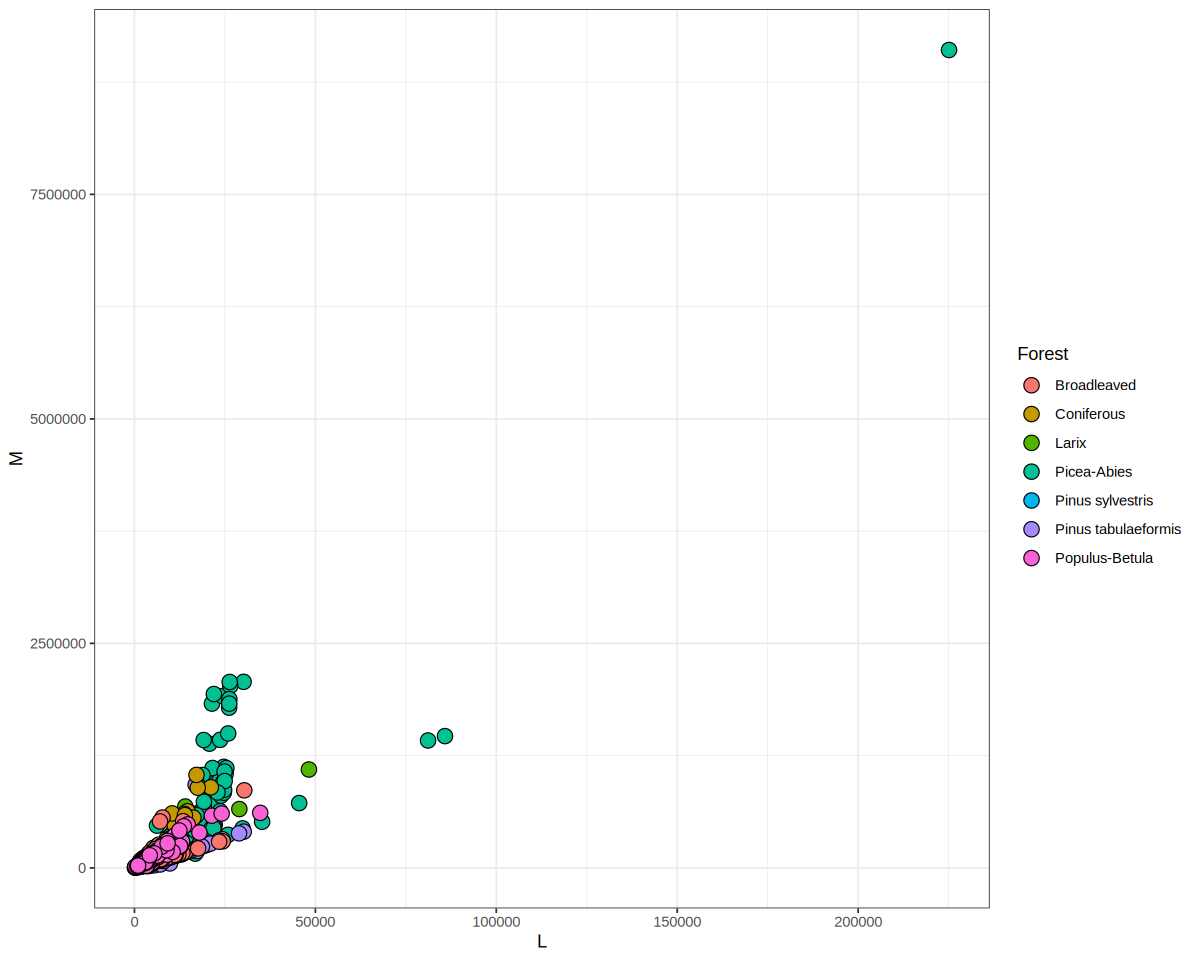

In [27]:
options(repr.plot.width = 10, repr.plot.height = 8)
ggplot(pd_data, aes(L, M)) +
        geom_point(aes(fill = Forest), shape = 21, size = 4) +
        theme_bw()

PCA
694 samples x 6 variables
standard scaling of predictors
1 (0%) NAs
      R2X(cum) pre ort
Total        1   6   0


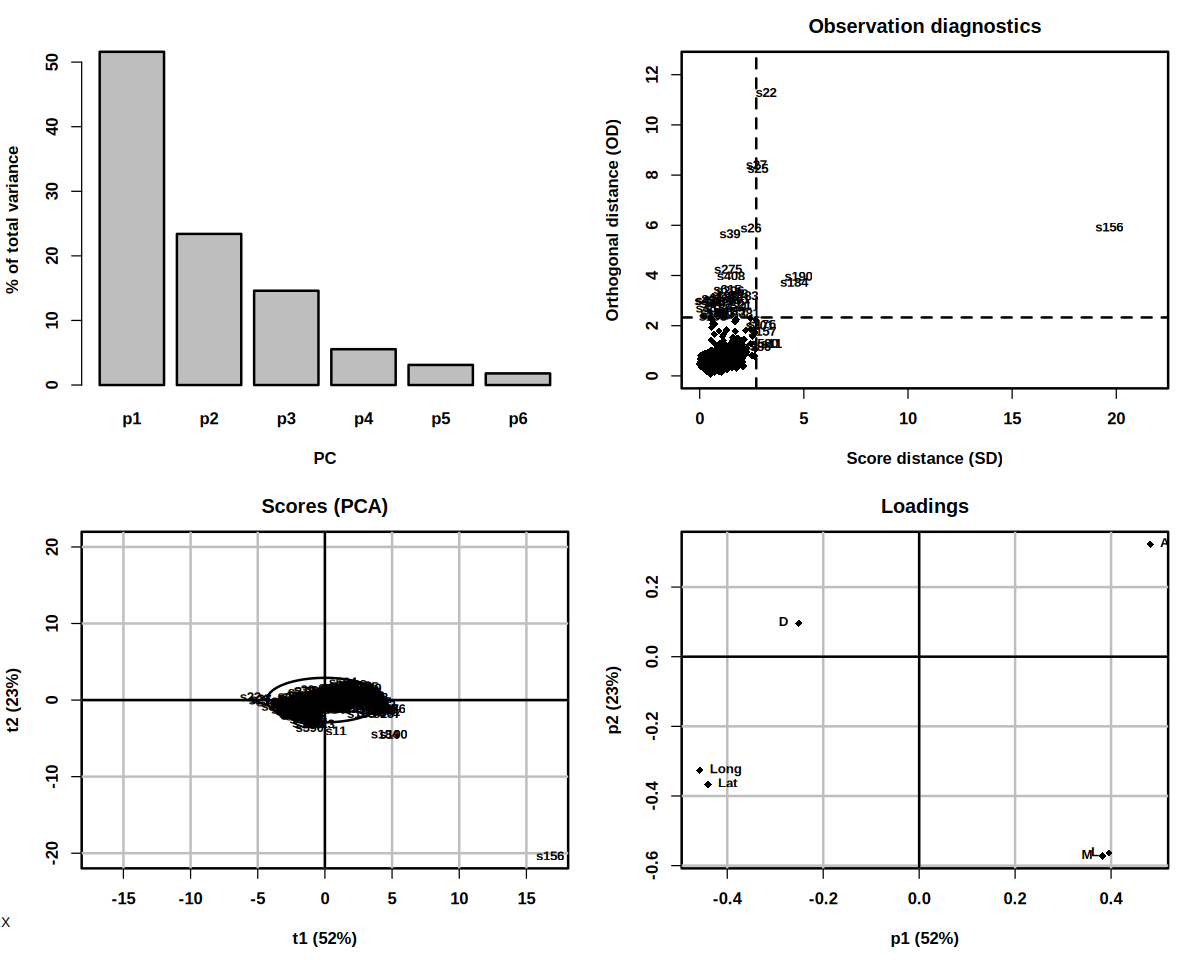

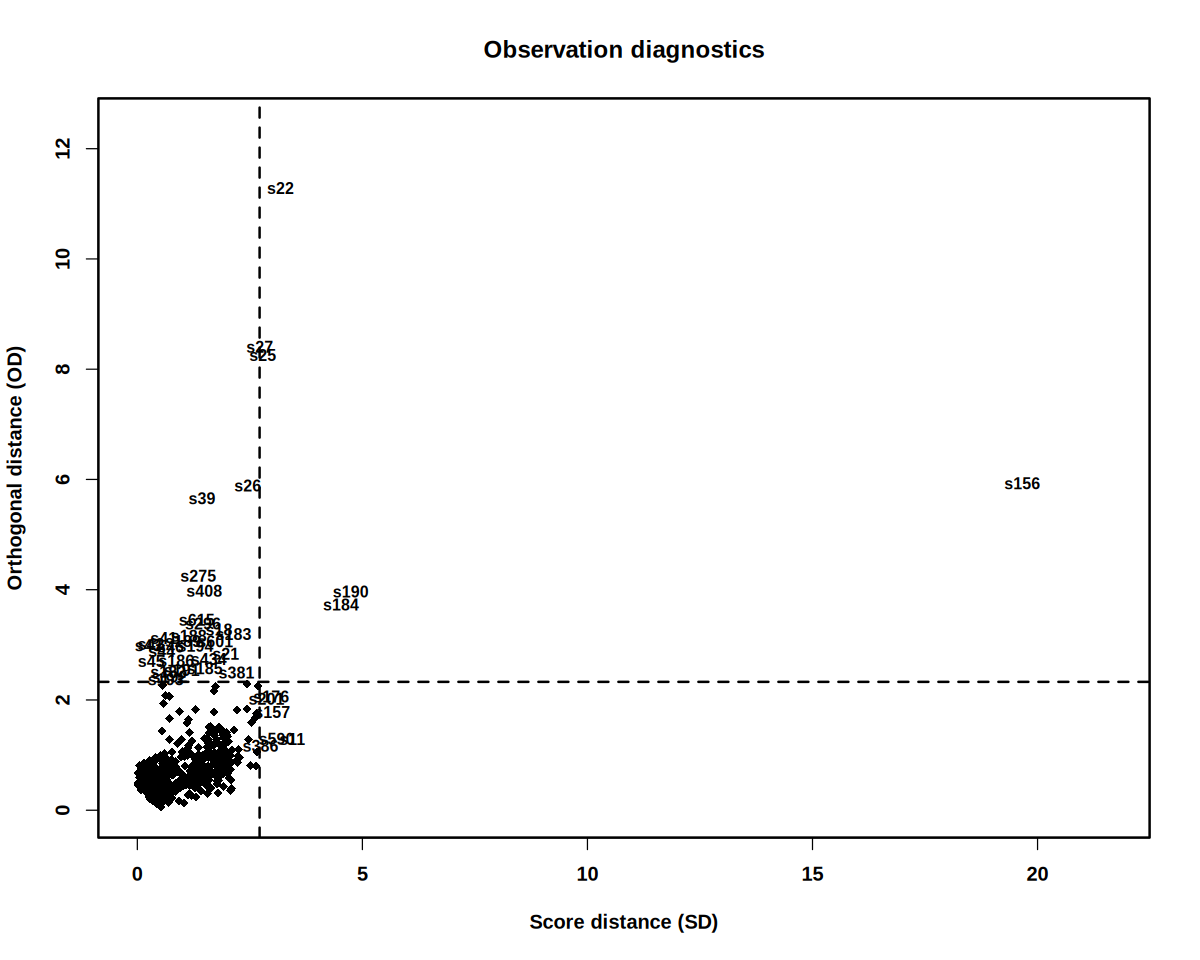

In [34]:
pca <- opls(pd_data[, 1:6], scaleC = 'standard', predI = 6)
plot(pca, typeVc= 'outlier')

PCA
693 samples x 6 variables
standard scaling of predictors
1 (0%) NAs
      R2X(cum) pre ort
Total        1   6   0


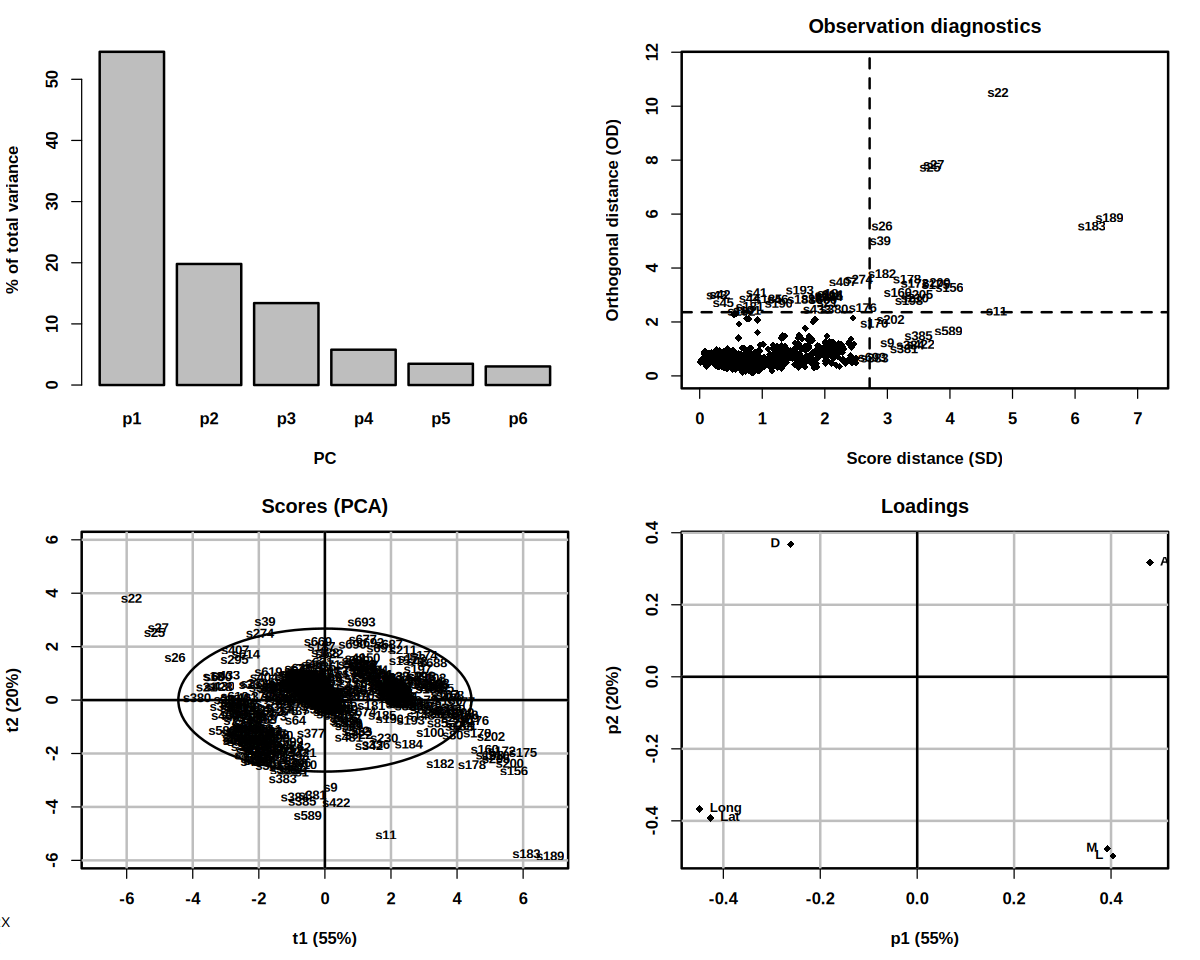

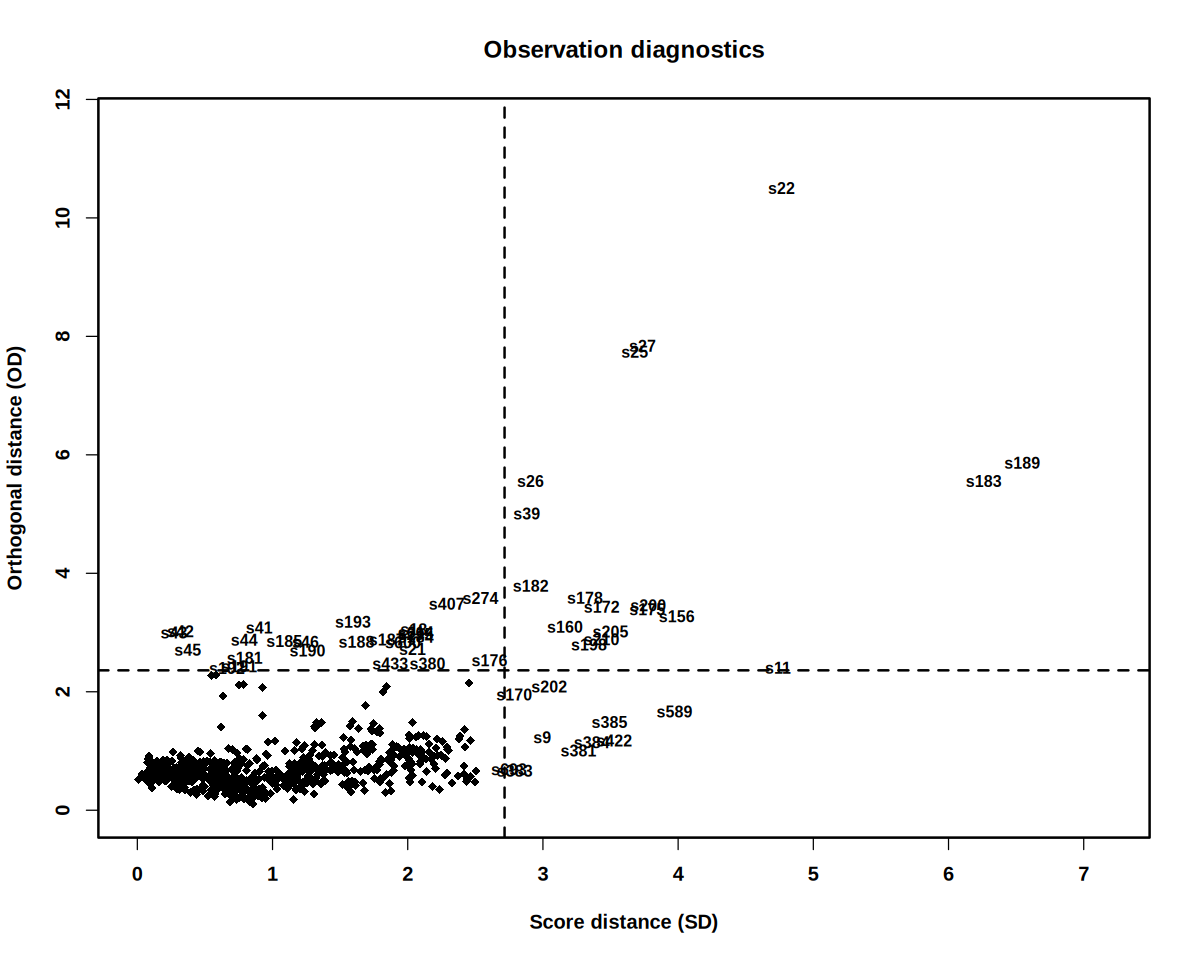

In [36]:
pd_data <- pd_data[-c(156),]
pca <- opls(pd_data[, 1:6], scaleC = 'standard', predI = 6)
plot(pca, typeVc= 'outlier')